In [1]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
import numpy as np

Using TensorFlow backend.


In [0]:
batch_size = 10
num_classes = 10
epochs = 20
img_width,img_height = 32,32

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('Shape of X is {} and Y is {}'.format(x_train.shape, y_train.shape))

Shape of X is (50000, 32, 32, 3) and Y is (50000, 10)


In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [0]:
from sklearn.model_selection import train_test_split as tts
x_train1,x_val,y_train1,y_val = tts(x_train,y_train,test_size=0.2,random_state=1)

In [6]:
print(x_train1.shape)
print(y_train1.shape)
print(x_val.shape)
print(x_val.shape)

(40000, 32, 32, 3)
(40000, 10)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [0]:
model = Sequential()

model.add(Conv2D(128, padding='same', kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(128, padding='same', kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, padding='same', kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, padding='same', kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, padding='same', kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, padding='same', kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))



model.add(Flatten())


model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(10, activation = "softmax"))

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 128)       9728      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 128)       512       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       147584    
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 256)       295168    
__________

In [0]:
from keras import optimizers
rmsprop_new = optimizers.RMSprop(lr=0.00009, rho=0.9, epsilon=None, decay=0.0)

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=rmsprop_new, metrics=['accuracy'])

In [11]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

train_gen = datagen.flow(x_train1, y_train1, 
                        batch_size=100)

validation_gen = (x_val, y_val) 
                        

trained_model = model.fit_generator(train_gen, steps_per_epoch = 400, epochs = 40, validation_data  = validation_gen)


Epoch 1/40
400/400 [==============================] - 67s 167ms/step - loss: 1.7804 - acc: 0.3686 - val_loss: 1.5661 - val_acc: 0.4541
Epoch 2/40
400/400 [==============================] - 63s 158ms/step - loss: 1.4275 - acc: 0.4904 - val_loss: 1.3330 - val_acc: 0.5367
Epoch 3/40
400/400 [==============================] - 63s 158ms/step - loss: 1.2490 - acc: 0.5559 - val_loss: 1.1258 - val_acc: 0.6115
Epoch 4/40
400/400 [==============================] - 63s 158ms/step - loss: 1.1218 - acc: 0.6052 - val_loss: 1.2100 - val_acc: 0.6128
Epoch 5/40
400/400 [==============================] - 63s 158ms/step - loss: 1.0082 - acc: 0.6442 - val_loss: 1.1188 - val_acc: 0.6420
Epoch 6/40
400/400 [==============================] - 63s 158ms/step - loss: 0.9315 - acc: 0.6731 - val_loss: 1.0575 - val_acc: 0.6713
Epoch 7/40
400/400 [==============================] - 63s 159ms/step - loss: 0.8599 - acc: 0.6956 - val_loss: 0.9534 - val_acc: 0.6880
Epoch 8/40
400/400 [==============================] - 6

In [12]:
score = model.evaluate(x_test, y_test)
print('Testing Accuracy: ',score[1]*100)

10000/10000 [==============================] - 7s 746us/step
Testing Accuracy:  83.48


In [0]:
import matplotlib.pyplot as plt

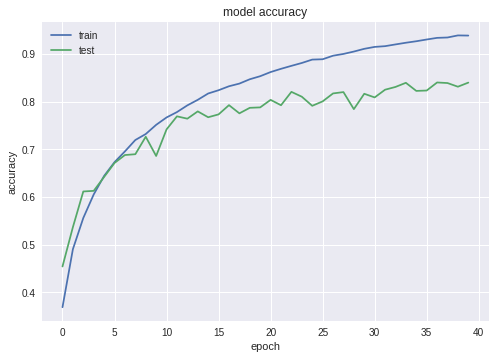

In [14]:
plt.plot(trained_model.history['acc'])
plt.plot(trained_model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

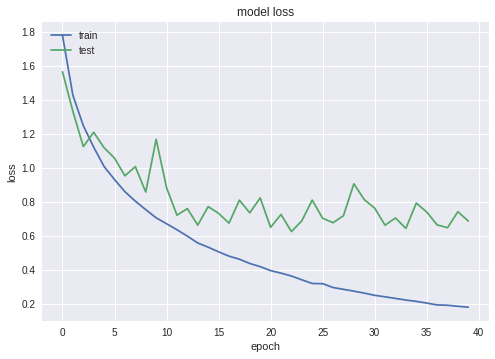

In [15]:
plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()